# 1. Naive Bayes

In [85]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [86]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y shape: {y.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X shape: (7043, 115)
X_train shape: (5634, 83)
X_test shape: (1409, 83)
y shape: (7043,)
y_train shape: (5634,)
y_test shape: (1409,)


## Data Visualization

### Feature Analysis

Integer Columns (int64):
 - Unnamed: 0
 - Count
 - Age
 - Number of Dependents
 - Zip Code
 - Number of Referrals
 - Tenure in Months
 - Avg Monthly GB Download
 - Total Extra Data Charges
 - Satisfaction Score
 - Churn Value
 - Churn Score
 - CLTV
 - LoyaltyID
 - Tenure

Float Columns (float64):
 - Latitude
 - Longitude
 - Avg Monthly Long Distance Charges
 - Monthly Charge
 - Total Charges
 - Total Refunds
 - Total Long Distance Charges
 - Total Revenue
 - Monthly Charges


In [87]:
category_columns = []
int_columns = []
float_columns = []
object_columns = []
category_columns = []

for col in df.columns:
    dtype = df[col].dtype
    if dtype == 'object':
        object_columns.append(col)
    elif dtype == 'int64':
        int_columns.append(col)
    elif dtype == 'float64':
        float_columns.append(col)
    else:
        category_columns.append(col)  

print("Integer Columns (int64):")
for col in int_columns:
    print(f" - {col}")

print("\nFloat Columns (float64):")
for col in float_columns:
    print(f" - {col}")

print("\nObject Columns (object):")
for col in object_columns:
    print(f" - {col}")

print("\nCategory Columns (category):")
for col in category_columns:
    print(f" - {col}")

Integer Columns (int64):
 - Count
 - Gender
 - Age
 - Under 30
 - Senior Citizen
 - Married
 - Dependents
 - Number of Dependents
 - City
 - Zip Code
 - Referred a Friend
 - Number of Referrals
 - Tenure in Months
 - Phone Service
 - Multiple Lines
 - Internet Service
 - Avg Monthly GB Download
 - Online Security
 - Online Backup
 - Device Protection Plan
 - Premium Tech Support
 - Streaming TV
 - Streaming Movies
 - Streaming Music
 - Unlimited Data
 - Paperless Billing
 - Total Extra Data Charges
 - Satisfaction Score
 - CLTV
 - Partner
 - Tenure
 - Country_United States
 - State_California
 - Quarter_Q3
 - Offer_Offer A
 - Offer_Offer B
 - Offer_Offer C
 - Offer_Offer D
 - Offer_Offer E
 - Internet Type_Cable
 - Internet Type_DSL
 - Internet Type_Fiber Optic
 - Contract_Month-to-Month
 - Contract_One Year
 - Contract_Two Year
 - Payment Method_Bank Withdrawal
 - Payment Method_Credit Card
 - Payment Method_Mailed Check
 - Device Protection_No
 - Device Protection_No internet service

Separate the dataset into two subsets:
1.	Continuous features (floats and original integer types that are not 0/1).
2.	Binary features (the 0/1 boolean encoded ones).

In [88]:
# Continuous features (floats and original integer types that are not 0/1)
continuous_features = [col for col in df.columns if df[col].dtype == 'float64' or (df[col].dtype == 'int64' and df[col].nunique() > 2)]

# Binary features (the 0/1 boolean encoded ones)
binary_features = [col for col in df.columns if df[col].dtype == 'int64' and df[col].nunique() == 2]

print("Continuous Features:")
print(continuous_features)

print("\nBinary Features:")
print(binary_features)


print(f"Number of continuous features: {len(continuous_features)}")
print(f"Number of binary features: {len(binary_features)}")

Continuous Features:
['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Tenure', 'Monthly Charges', 'Lat', 'Long', 'SeniorCitizen_Dependents', 'Tenure_Age_Ratio', 'AvgMonthlyGB_StreamServices', 'MonthlyCharge_TotalCharges_Ratio', 'AvgMonthlyGB_Tenure', 'Total_Services_Used', 'Streaming_Services_Count', 'Tenure_in_Years', 'Monthly_Charges_Scaled', 'Refund_to_Charges_Ratio', 'Extra_Data_Usage_Cost_Proportion', 'Lifetime_Value_per_Month']

Binary Features:
['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Strea

### Feature Preparation

In [89]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous features and transform them
X_train_continuous_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_continuous_scaled = scaler.transform(X_test[continuous_features])

# Print the scaled continuous features
print("Scaled Continuous Features (Train):")
print(X_train_continuous_scaled)

print("\nScaled Continuous Features (Test):")
print(X_test_continuous_scaled)

Scaled Continuous Features (Train):
[[-1.39137733 -0.48230353 -1.27350946 ... -0.16825819 -0.11872453
   0.50879151]
 [ 0.75701875  2.62673317  0.8767037  ... -0.16825819 -0.11872453
  -0.27743449]
 [-1.451055   -0.48230353 -0.26183579 ... -0.16825819 -0.11872453
  -0.43519509]
 ...
 [-0.85427831  2.62673317  0.97103983 ...  1.70176241 -0.11872453
  -0.14902546]
 [-0.97363365 -0.48230353  0.16755625 ... -0.16825819 -0.11872453
  -0.44054084]
 [ 1.65218379 -0.48230353 -0.09918729 ...  2.82489435 -0.11872453
  -0.42691019]]

Scaled Continuous Features (Test):
[[-1.27202199e+00 -4.82303528e-01 -7.04239710e-01 ... -1.68258191e-01
   2.95385810e+00  4.24925132e+00]
 [-4.96212297e-01 -4.82303528e-01  1.44272048e+00 ... -1.68258191e-01
  -1.18724528e-01 -3.28447162e-01]
 [-4.36534628e-01 -4.82303528e-01 -1.32230401e+00 ... -1.68258191e-01
  -1.18724528e-01 -4.59953134e-01]
 ...
 [-1.57041034e+00 -4.82303528e-01  1.46874424e+00 ... -1.68258191e-01
  -1.18724528e-01 -1.66674898e-01]
 [-1.092988


For Gaussian Naive Bayes, we only analyze the int and float datatypes to check if they are normally distributed because this algorithm assumes that the features follow a normal (Gaussian) distribution. For the Boolean datatypes that we have converted into integers, we can apply Multinomial Naive Bayes.



- `get_numeric_features_distribution` - shows distributions of all numeric features from provided dataframe. Flag  `compare_with_normal_distribution` is for comparison existing features' distributions with the normal distribution since Gaussian Naive Bayes assumes that features are normally distributed. For estimation of the feature distributions were chosen the following metrics:
    - Kolmogorov-Smirnov (KS) test which assesses whether a sample comes from a specific distribution.
    - P-value, which indicates the probability of observing a KS statistic as extreme as the one computed from the sample, assuming the null hypothesis is true. Small p-value (< 0.05) indicates a significant difference between the sample and the specified distribution, Large p-value (> 0.05) suggests that there is no significant difference.
- `get_feature_distribution` - shows distribution for the particular feature (latitude by default)

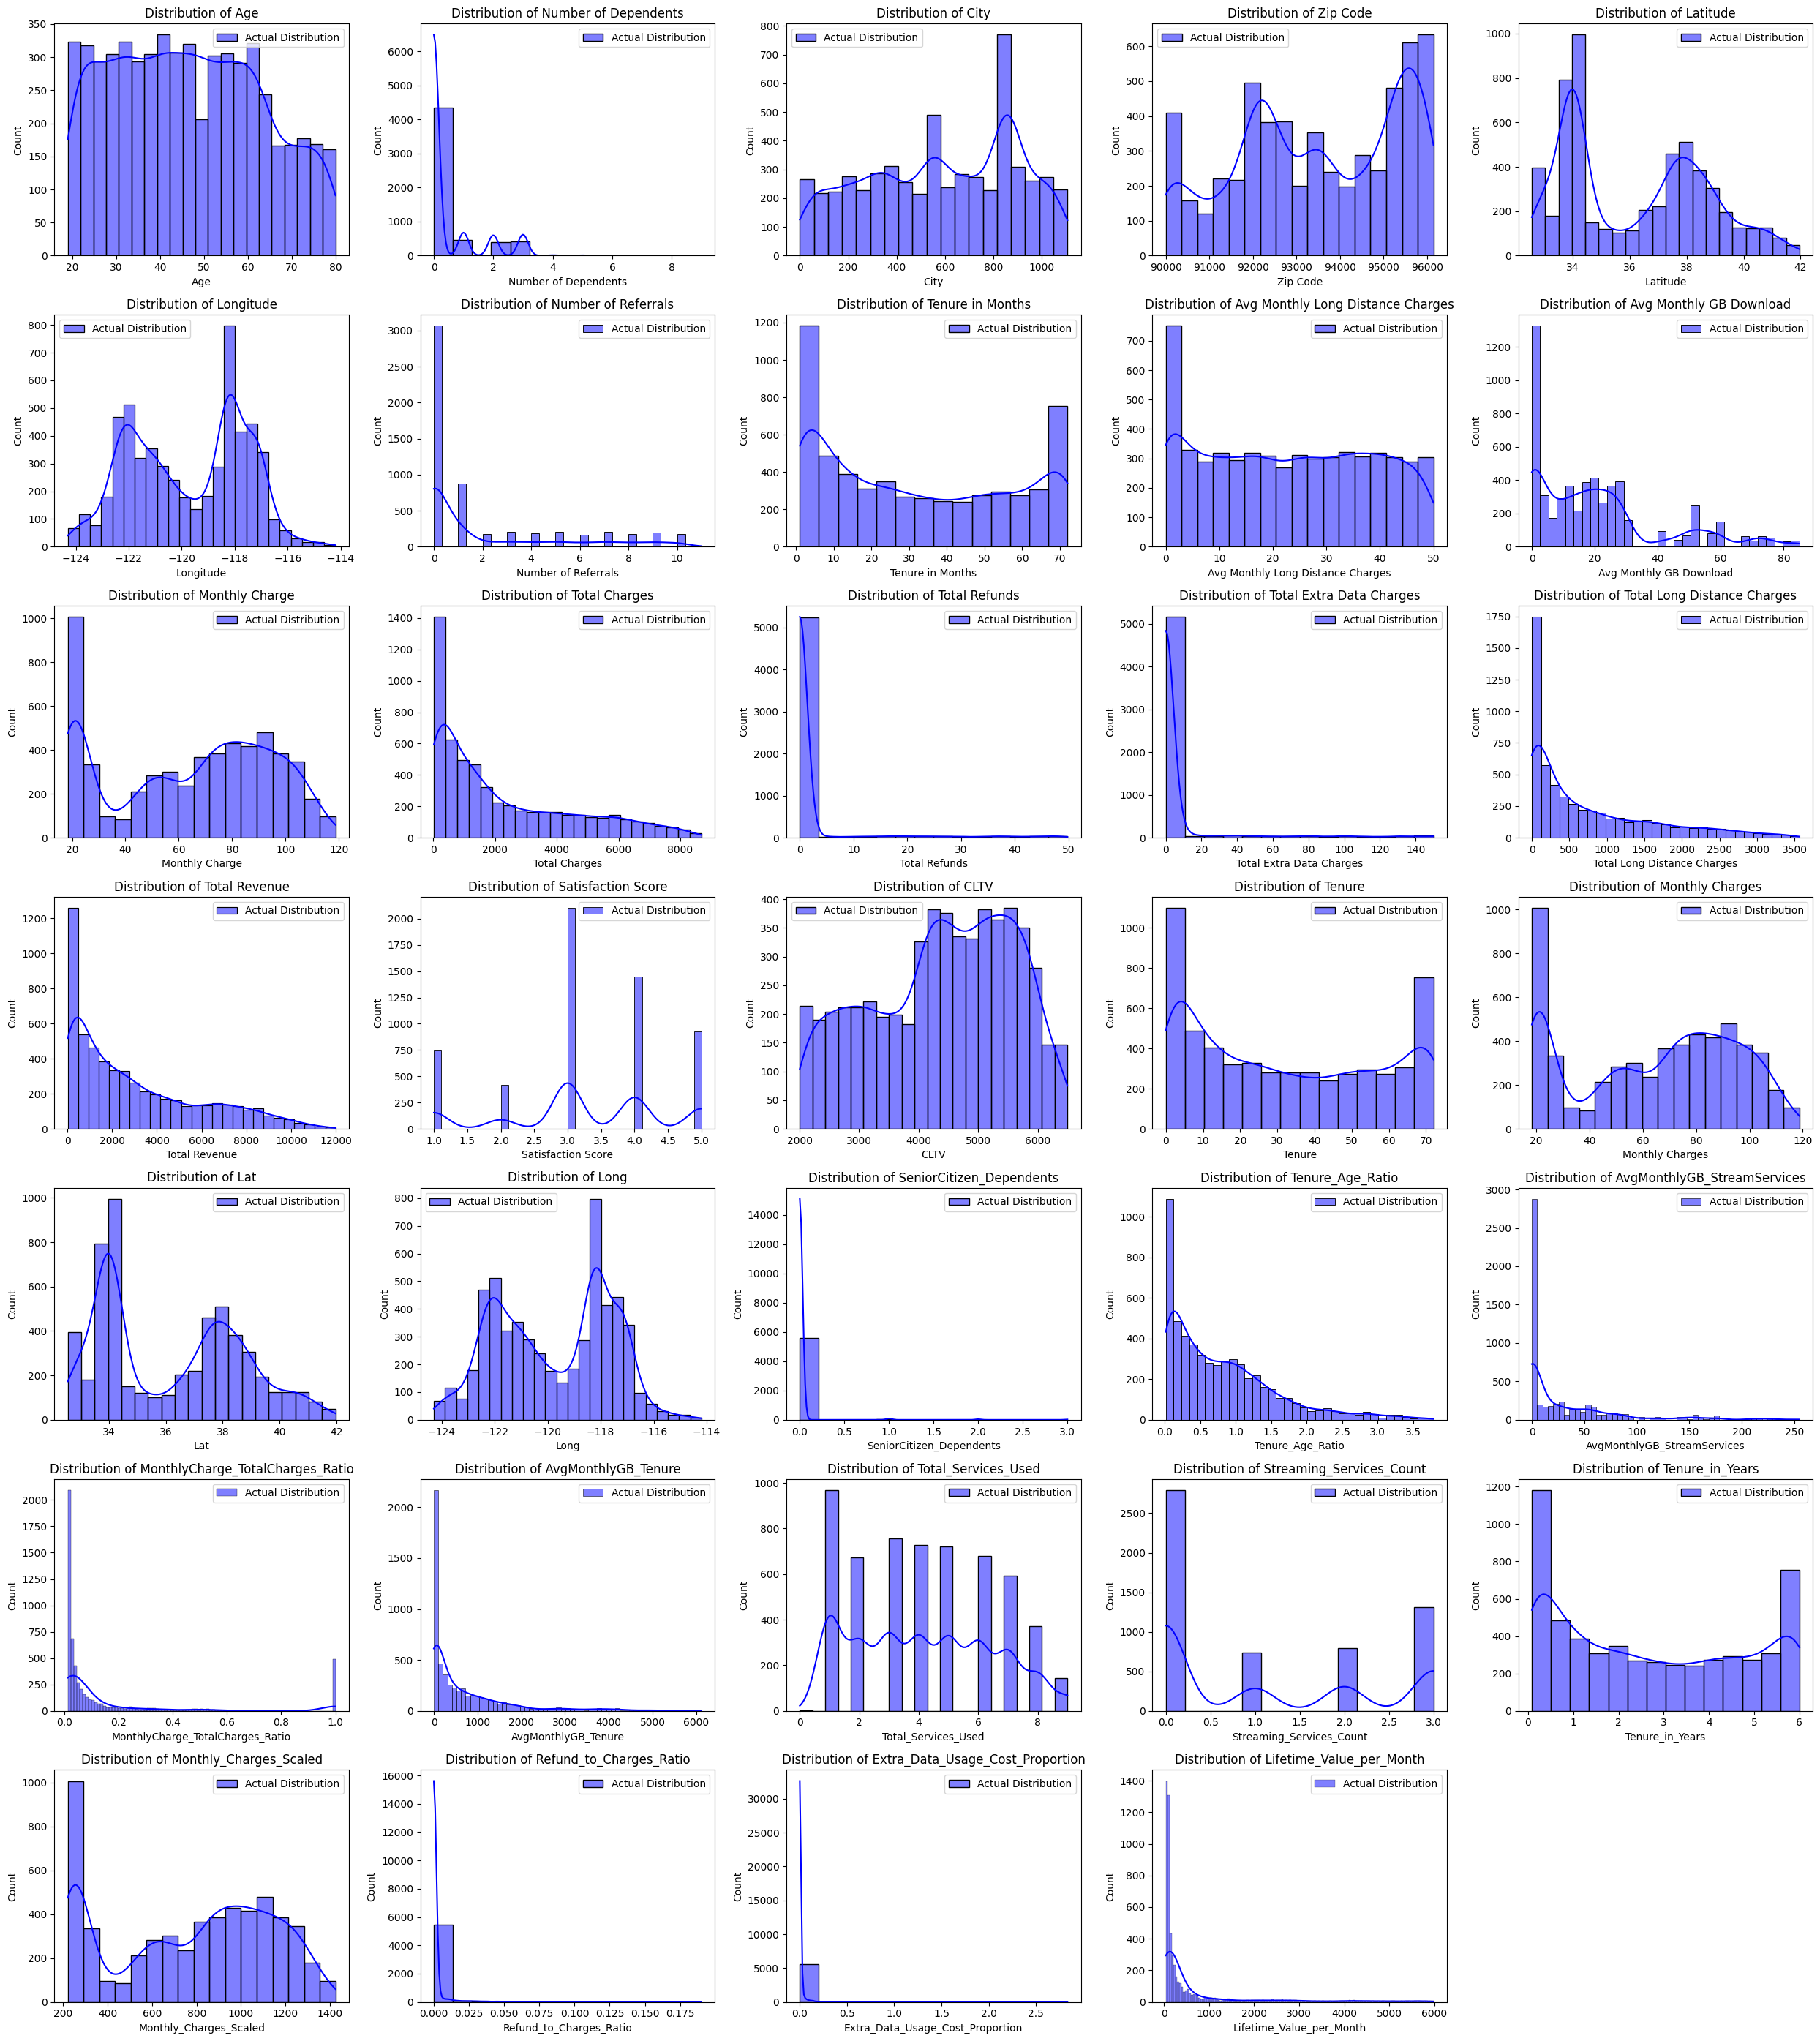

{}

In [90]:
import numpy as np
from scipy.stats import norm, kstest

def get_numeric_features_distribution_info(X_train_continuous_scaled, compare_with_normal_distribution=False):
    # Select numeric features
    numeric_features = continuous_features

    # Set up the matplotlib figure for feature distributions
    num_features = len(numeric_features)
    num_cols = 5
    num_rows = (num_features // num_cols) + 1
    plt.figure(figsize=(num_cols * 5, num_rows * 4))

    # Create a dictionary to store KS statistics and p-values
    ks_results = {}

    for i, feature in enumerate(numeric_features, 1):
        # Plot histograms for each numeric feature
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[feature], kde=True, color='blue', label='Actual Distribution')

        if compare_with_normal_distribution:
            # Plot the normal distribution line
            mu, std = df[feature].mean(), df[feature].std()
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            scale_factor = len(df[feature]) / len(x)
            plt.plot(x, p * scale_factor, 'y', linewidth=2, label='Normal Distribution')

            # Calculate metrics for comparison
            ks_statistic, ks_p_value = kstest(df[feature], 'norm', args=(mu, std))
            print(f"{feature} - KS Statistic: {ks_statistic}, KS P-Value: {ks_p_value}")

            # Store metrics in the dictionary
            ks_results[feature] = {'ks_statistic': ks_statistic, 'ks_p_value': ks_p_value}

        plt.title(f'Distribution of {feature}')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return ks_results
    

def get_feature_distribution(df, target_column='track_genre'):
    # Display the first 10 instances of the target variable
    print(f"First 10 instances of '{target_column}':")
    print(df[target_column].head(10))

    # Display value counts for the target variable
    print(f"\nValue counts for '{target_column}':")
    print(df[target_column].value_counts())

    # Display the distribution of the target variable with counts on the y-axis
    value_counts = df[target_column].value_counts()

    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
    plt.title(f'Distribution of {target_column} with Counts')
    plt.xlabel(target_column)
    plt.ylabel('Count')

    # Rotate x-labels vertically and set font size
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, fontsize=8)

    plt.show()

get_numeric_features_distribution_info(df)


As redundant and irrelevant variables can decrease performance of the Naive Bayes, we will try to omit them. Correlation matrix will help us to reveal redundant features (features with strong correlation)

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix among numeric features
correlation_matrix = numeric_features.corr()

# Set the upper triangle of the correlation matrix (including the diagonal) to NaN
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find strongly correlated pairs of features (using a threshold, e.g., 0.5)
strongly_correlated_pairs = []
for i in range(len(upper_triangle.columns)):
    for j in range(i + 1, len(upper_triangle.columns)):
        if upper_triangle.iloc[i, j] > 0.5:
            feature_i, feature_j = upper_triangle.columns[i], upper_triangle.columns[j]
            correlation_value = upper_triangle.iloc[i, j]
            strongly_correlated_pairs.append((feature_i, feature_j, correlation_value))

# Display strongly correlated pairs and their correlation values
print("Strongly correlated pairs of features and their correlation values:")
for pair in strongly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix of Numeric Features')
# plt.show()

Strongly correlated pairs of features and their correlation values:
Age and Senior Citizen: 0.6800158967105888
Under 30 and Avg Monthly GB Download: 0.5230111376107593
Married and Referred a Friend: 0.9482739217984573
Married and Number of Referrals: 0.6703891249683931
Married and Partner: 1.0
Dependents and Number of Dependents: 0.8837228180734594
Zip Code and Latitude: 0.894423587030175
Zip Code and Lat: 0.894423587030175
Latitude and Lat: 1.0
Longitude and Long: 0.9999999999998697
Referred a Friend and Number of Referrals: 0.70695725101979
Referred a Friend and Partner: 0.9482739217984569
Number of Referrals and Partner: 0.6703891249683931
Tenure in Months and Total Charges: 0.8234089305147175
Tenure in Months and Total Long Distance Charges: 0.6755657079878852
Tenure in Months and Total Revenue: 0.8516089667645729
Tenure in Months and Tenure: 0.9998974874688928
Tenure in Months and Contract_Two Year: 0.5340463657741085
Tenure in Months and Tenure_Age_Ratio: 0.8224345584112086
Tenur

In [92]:
# Create a set to hold the features to be removed
features_to_remove = set()

# Iterate through the correlation matrix and identify features to remove
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            feature_to_remove = correlation_matrix.columns[j]
            features_to_remove.add(feature_to_remove)

# Remove the identified features from the dataframe
df_reduced = df.drop(columns=features_to_remove)

print(f"Features to remove: {features_to_remove}")
print(f"Remaining features: {df_reduced.columns}")

Features to remove: {'Tech Support_No internet service', 'Long', 'Tenure_in_Years', 'Device Protection_No internet service', 'Monthly Charges', 'Digital_Payments', 'Lat', 'Tech Support_Yes', 'Partner', 'Referred a Friend', 'Lifetime_Value_per_Month', 'Traditional_Payments', 'Monthly_Charges_Scaled', 'Total Revenue', 'Streaming_Services_Count', 'Device Protection_Yes', 'Tenure'}
Remaining features: Index(['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',

Apply Gaussian Naive Bayes on the continuous features.

In [93]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

X_train_reduced = X_train[df_reduced.columns]
X_test_reduced = X_test[df_reduced.columns]

# Fit the model on the continuous features
gnb.fit(X_train[continuous_features], y_train)

# Predict using the model
y_pred_continuous = gnb.predict(X_test[continuous_features])

# Evaluate the model
accuracy_continuous = accuracy_score(y_test, y_pred_continuous)
precision_continuous = precision_score(y_test, y_pred_continuous)
recall_continuous = recall_score(y_test, y_pred_continuous)
f1_continuous = f1_score(y_test, y_pred_continuous)
roc_auc_continuous = roc_auc_score(y_test, y_pred_continuous)


print(f'Accuracy (Continuous Features): {accuracy_continuous:.2f}')
print(f'Precision (Continuous Features): {precision_continuous:.2f}')
print(f'Recall (Continuous Features): {recall_continuous:.2f}')
print(f'F1 (Continuous Features): {f1_continuous:.2f}')


Accuracy (Continuous Features): 0.83
Precision (Continuous Features): 0.64
Recall (Continuous Features): 0.84
F1 (Continuous Features): 0.72


Apply Multinomial (or Bernoulli) Naive Bayes on the binary features.

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the binary features and transform them
X_train_binary_scaled = scaler.fit_transform(X_train[binary_features])
X_test_binary_scaled = scaler.transform(X_test[binary_features])

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the scaled binary features
mnb.fit(X_train_binary_scaled, y_train)

# Predict using the model
y_pred_binary = mnb.predict(X_test_binary_scaled)

# Evaluate the model
accuracy_binary = accuracy_score(y_test, y_pred_binary)
precision_binary = precision_score(y_test, y_pred_binary)
recall_binary = recall_score(y_test, y_pred_binary)
f1_binary = f1_score(y_test, y_pred_binary)
roc_auc_binary = roc_auc_score(y_test, y_pred_binary)

print(f'Accuracy (Binary Features): {accuracy_binary:.2f}')
print(f'Precision (Binary Features): {precision_binary:.2f}')
print(f'Recall (Binary Features): {recall_binary:.2f}')
print(f'F1 (Binary Features): {f1_binary:.2f}')
print(f'ROC AUC (Binary Features): {roc_auc_binary:.2f}')

Accuracy (Binary Features): 0.81
Precision (Binary Features): 0.62
Recall (Binary Features): 0.72
F1 (Binary Features): 0.67
ROC AUC (Binary Features): 0.78


Combine the probabilities from both models to make a final prediction

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Get the probabilities from both models
prob_continuous = gnb.predict_proba(X_test[continuous_features])
prob_binary = mnb.predict_proba(X_test[binary_features])

# Combine the probabilities by averaging them
combined_prob = (prob_continuous + prob_binary) / 2

# Make the final prediction based on the combined probabilities
y_pred = combined_prob.argmax(axis=1)

# Evaluate the combined model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy (Combined Model): {accuracy:.2f}')
print(f'Precision (Combined Model): {precision:.2f}')
print(f'Recall (Combined Model): {recall:.2f}')
print(f'F1 (Combined Model): {f1:.2f}')
print(f'ROC AUC (Combined Model): {roc_auc:.2f}')


Accuracy (Combined Model): 0.84
Precision (Combined Model): 0.65
Recall (Combined Model): 0.82
F1 (Combined Model): 0.72
ROC AUC (Combined Model): 0.83


/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [96]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/NaiveBayes.csv", index=False)


# Evaluation Metrics
1. Accuracy
    - Accuracy is a metric that measures the proportion of correct classifications made by the model. In a customer churn prediction project, it indicates the overall number of customers who were correctly classified as either churned or not churned.
    - In this project, accuracy can provide a general sense of how well the model performs in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.
2. Precision and Recall
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations that were predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    -  In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall, on the other hand, helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
3. F1-Score
    -  F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
     - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. It helps find an optimal balance for identifying at-risk customers accurately without missing too many.
4. ROC-AUC Score
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes.

## Accuracy
- Accuracy represents the overall performance of the model on the test set. Specifically, it is the ratio of the number of correctly classified samples to the total number of samples in the test set. In this example, the model achieved an accuracy of 0.93 (i.e., 93%), which means that the model correctly predicted 93% of the samples in the test set.

- While an accuracy of 93% may seem high, in customer churn prediction projects, churn is often an imbalanced problem. Relying solely on accuracy may not provide a comprehensive evaluation of the model's performance. In imbalanced datasets, the model may be biased towards the majority class (e.g., predicting that most customers will not churn), leading to high accuracy but potentially failing to effectively identify the minority (churned) customers. Therefore, additional evaluation metrics (such as precision, recall, and F1 score) are required for a more comprehensive assessment of the model's performance.

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


##  Precision and Recall
- In this example, precision and recall are used to evaluate the model's performance in predicting customer churn.

- Precision measures the accuracy of positive predictions. Specifically, it calculates the proportion of actual churned customers among those predicted to churn by the model. A precision of 0.87 indicates that 87% of the customers predicted to churn by the model actually did churn.

- Recall measures the model's ability to correctly identify all actual positive cases. It calculates the proportion of correctly predicted churned customers out of all actual churned customers. A recall of 0.88 indicates that the model was able to identify 88% of the actual churned customers.

- These two metrics are important for assessing a model's ability to detect positive instances, especially when the data is imbalanced. In a customer churn prediction scenario, a higher recall indicates better identification of customers who are at risk of churning, whereas higher precision indicates fewer false positive churn predictions.

In [98]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, pos_label=1)  
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.65
Recall: 0.82


## F1-Score
- F1-score is a metric that combines precision and recall into a single value to provide a balanced measure of the model’s performance, especially useful in imbalanced datasets. It is defined as the harmonic mean of precision and recall, giving an overall sense of how well the model can balance these two metrics. In this case, the F1-score is 0.86, meaning that the model is effectively balancing the correct identification of churned customers (recall) with the precision of these predictions. This metric is particularly useful when it is important to both identify as many positive cases as possible while minimizing false positives.

In [99]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'F1-Score: {f1:.2f}')

F1-Score: 0.72


## ROC-AUC Score
-  The ROC-AUC Score is a measure of how well the model can distinguish between positive and negative classes. It calculates the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate (recall) against the false positive rate. A higher ROC-AUC score (closer to 1) means that the model has a strong ability to correctly classify positive and negative cases, effectively distinguishing between churned and non-churned customers.

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')


ROC-AUC Score: 0.83


## Summary
Overall, the Naive Bayes model has performed well in terms of accuracy, precision, recall, F1-score, and ROC-AUC score. It has achieved high scores across all metrics, suggesting that it is capable of predicting customer churn effectively. However, it is still essential to keep in mind that the context of the data, especially its imbalance, might mean relying solely on accuracy is insufficient. The combination of metrics indicates that the model is good at both identifying churned customers and minimizing incorrect predictions.

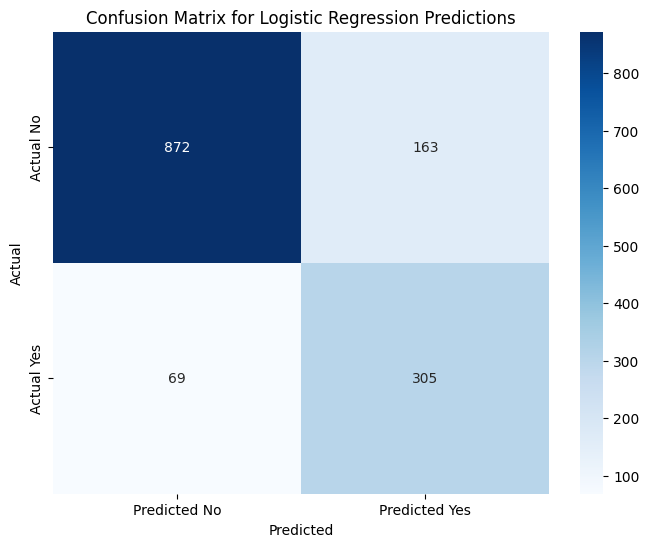

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Predictions')
plt.show()

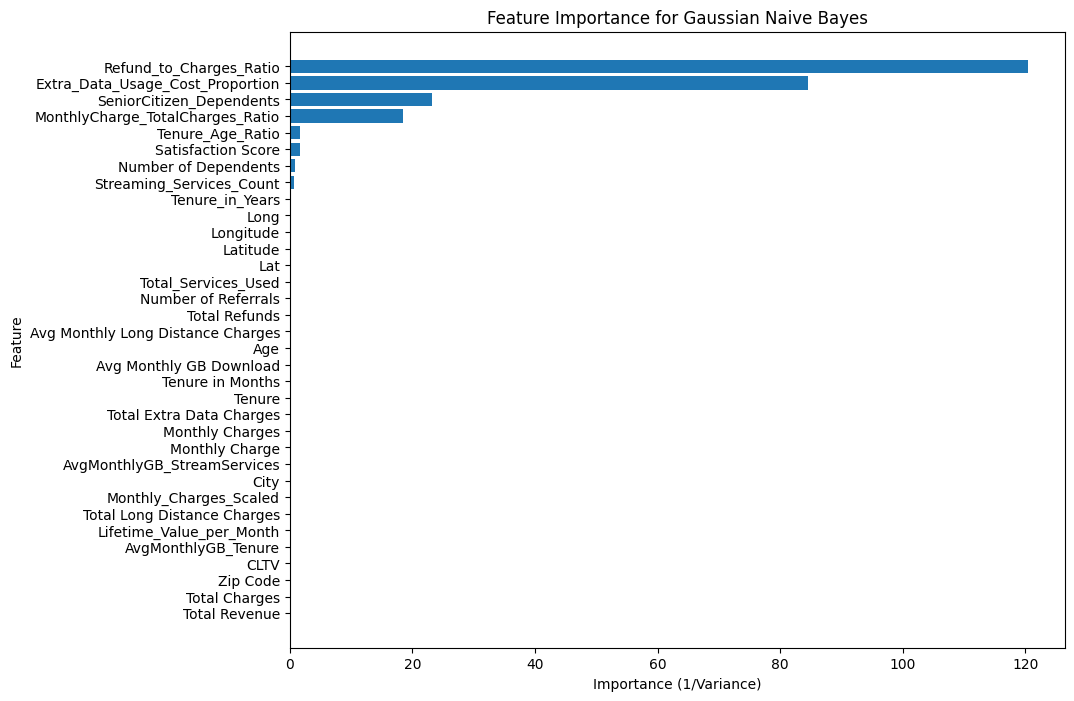

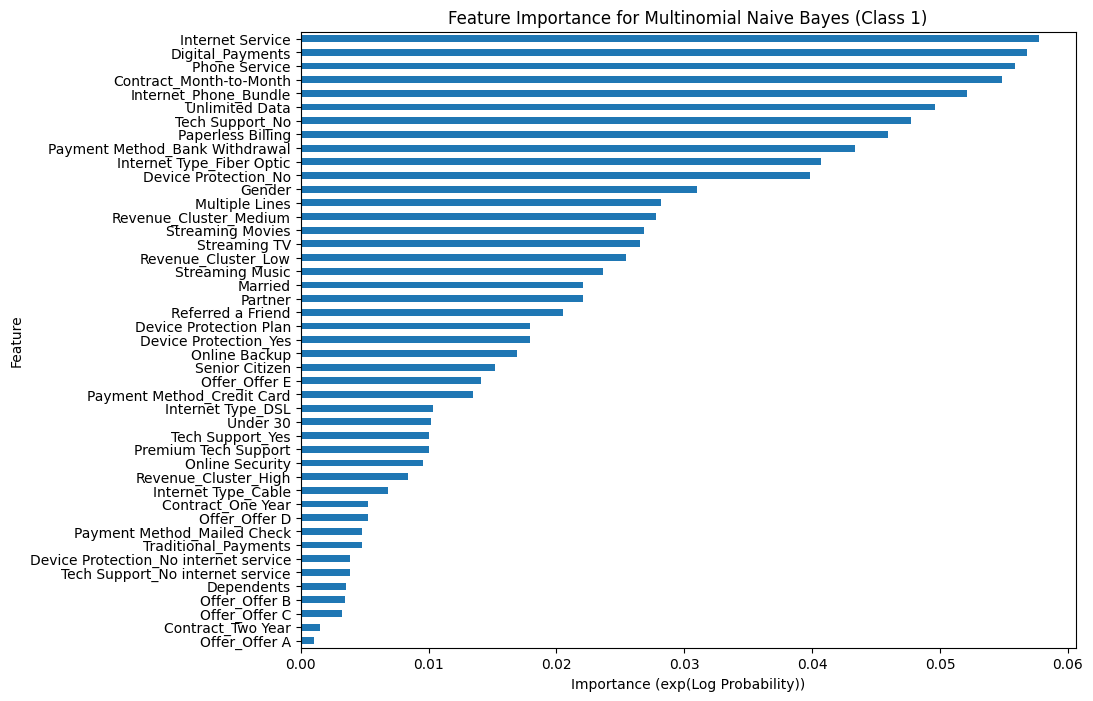

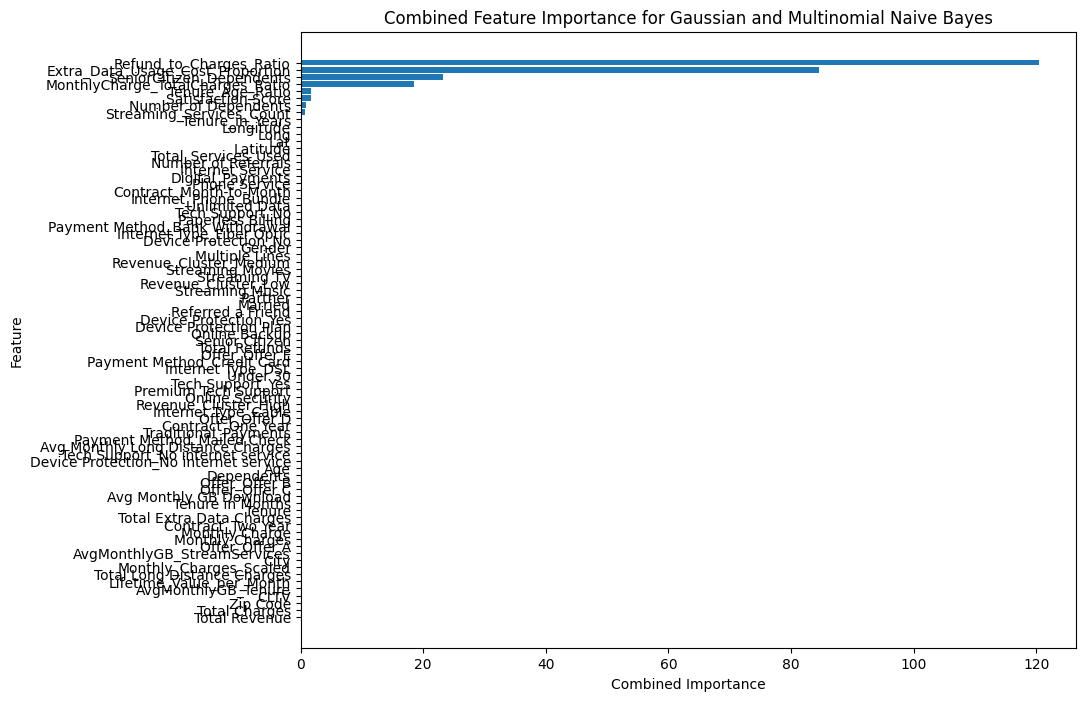

In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Get the feature names
feature_names = X_train[continuous_features].columns

# Get the means and variances from the Gaussian Naive Bayes model
means = gnb.theta_
variances = gnb.var_

# Calculate the importance as the inverse of the variance (features with lower variance are more important)
importance = 1 / variances

# Create a DataFrame to hold feature names and their corresponding importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance[0]})

# Sort the DataFrame by the importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance (1/Variance)')
plt.ylabel('Feature')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.gca().invert_yaxis()
plt.show()
# Get the feature names for binary features
binary_feature_names = X_train[binary_features].columns

# Get the class log prior and feature log probabilities from the Multinomial Naive Bayes model
class_log_prior = mnb.class_log_prior_
feature_log_prob = mnb.feature_log_prob_

# Calculate the importance as the exponent of the feature log probabilities (features with higher probabilities are more important)
importance_binary = np.exp(feature_log_prob)

# Create a DataFrame to hold feature names and their corresponding importance for each class
feature_importance_binary_df = pd.DataFrame(importance_binary.T, index=binary_feature_names, columns=['Class 0 Importance', 'Class 1 Importance'])

# Sort the DataFrame by the importance for class 1
feature_importance_binary_df = feature_importance_binary_df.sort_values(by='Class 1 Importance', ascending=False)

# Plot the feature importance for binary features
plt.figure(figsize=(10, 8))
feature_importance_binary_df['Class 1 Importance'].plot(kind='barh')
plt.xlabel('Importance (exp(Log Probability))')
plt.ylabel('Feature')
plt.title('Feature Importance for Multinomial Naive Bayes (Class 1)')
plt.gca().invert_yaxis()
plt.show()

# Combine the importance from both models by concatenating them
combined_importance = np.concatenate((importance[0], importance_binary[1]))

# Combine the feature names from both models
combined_feature_names = np.concatenate((feature_names, binary_feature_names))

# Create a DataFrame to hold feature names and their corresponding combined importance
combined_feature_importance_df = pd.DataFrame({'Feature': combined_feature_names, 'Importance': combined_importance})

# Sort the DataFrame by the combined importance
combined_feature_importance_df = combined_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the combined feature importance
plt.figure(figsize=(10, 8))
plt.barh(combined_feature_importance_df['Feature'], combined_feature_importance_df['Importance'])
plt.xlabel('Combined Importance')
plt.ylabel('Feature')
plt.title('Combined Feature Importance for Gaussian and Multinomial Naive Bayes')
plt.gca().invert_yaxis()
plt.show()